# Economy of Europe 2022: Audience: Non Technical. 

# My Story

Four and a half years ago, my husband and I decided to take the adventure of our lives and more to Europe, more precisely, the United Kingdom. From a South African perspective, Europe was always seen as a place of endless opportunities.  Most South Africans see Europe as a group of countries run by governments that are not entirely corrupt and strive to create a better future for their people. This was something we never saw from our fellow government in South Africa. So, when the opportunity came, we took it and moved to the UK. 

Now, in the year 2022, Europe seems to be in economic distress. With the prices of cost of living doubled in a few months, unemployment rates soared, and some of the highest inflation rates in decades. 

When I was searching for a dataset to analyse, I was intrigued by this dataset, with many exciting questions I wanted to answer through exploring it and finding possible trends.  


# What is happening in Europe right now

Inflation shows no signs of abating. On the contrary, the official flash estimate for October sees inflation in the Eurozone at another record high of 10.7%, after reaching 9.9% in September. This surge was once again driven by not only accelerating energy prices, which increased by 42%, but also food prices, which were up 13%. 

Even without any new energy supply disruptions, inflation could remain higher for longer. Most of the inflation surge so far is driven by high commodity prices—primarily energy, but also food, particularly in the Western Balkan countries. While these prices might remain elevated for some time, there is hope that they will stop increasing and thereby contribute to a steady decline in inflation throughout 2023.

# About the Dataset

This dataset includes economic records from 42 European countries. The perspective of the collection of this  dataset is that it is important to note that important political and financial events in member countries are sensitive to, adjust to, separate, and affect GDP.

The foremost EMU adopters are Germany, France, and Italy, for which the financial statistics of these 3 countries are most applicable to the euro, to broaden the EMU financial information as well.

This dataset was downloaded from Kaggel: https://www.kaggle.com/datasets/hanzlanawaz/economy-of-europe-2022 

# Possible questions that intrigured me from this dataset. 

1. Is a healthy GDP linked to a smaller or larger population? 
2. Does the jobless rate affect the GDP and /or Governemnt budget? 
3. How does inflation affect the jobless rate in a country? 

# Import the libraries

In [54]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from ipywidgets import widgets

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import xgboost as xgb

pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 1000 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False
import re 

In [2]:
import matplotlib.style as style 
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
style.use('seaborn-poster')
style.use('ggplot')

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Load the data

In [5]:
data_df = pd.read_csv("/Users/courtneydavid/Documents/Data Science Springboard Career Track Course/Data Story Telling Task/Economy_Indicators.csv")

# EDA of Data

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. 
I will conduct an EDA of this dataset to see if there are any answers to my questions mentioned above.

In [6]:
data_df.columns

Index(['Country', 'GDP', 'GDP Year-over-Year', 'GDP Quarter-over-Quarterr',
       'Interest Rate', 'Inflation Rate', 'Jobless Rate', 'Gov. Budget',
       'Debt/GDP', 'Current Account', 'Population'],
      dtype='object')

In [7]:
data_df.dtypes

Country                       object
GDP                            int64
GDP Year-over-Year           float64
GDP Quarter-over-Quarterr     object
Interest Rate                 object
Inflation Rate               float64
Jobless Rate                 float64
Gov. Budget                  float64
Debt/GDP                     float64
Current Account              float64
Population                   float64
dtype: object

In [9]:
data_df.info

<bound method DataFrame.info of                    Country    GDP  GDP Year-over-Year  \
0                Euro Area  14493                4.10   
1                  Germany   4223                1.70   
2           United Kingdom   3187                4.40   
3                   France   2937                4.20   
4                    Italy   2100                5.00   
5                   Russia   1776               -4.10   
6                    Spain   1425                6.80   
7              Netherlands   1018                5.10   
8                   Turkey    815                7.60   
9              Switzerland    813                2.80   
10                  Poland    674                5.50   
11                  Sweden    627                3.80   
12                 Belgium    600                3.30   
13                 Ireland    499               11.10   
14                  Norway    482                3.90   
15                 Austria    477                6.00   

In [10]:
data_df.describe()

,GDP,GDP Year-over-Year,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
count,42.000000,42.000000,42.00000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,930.666667,3.245952,14.95000,7.103571,-3.569048,64.829524,0.192857,27.893333
std,2341.577107,6.994028,12.46537,5.151838,3.501880,37.718270,5.772407,58.400889
min,9.000000,-37.200000,3.30000,1.900000,-8.900000,18.100000,-11.600000,0.370000
25%,62.250000,2.372500,9.07500,4.000000,-6.150000,41.525000,-2.850000,2.807500
50%,233.000000,3.930000,11.63500,5.750000,-3.900000,54.900000,-0.750000,7.770000
75%,662.250000,6.075000,17.35000,8.400000,-1.175000,79.375000,2.950000,18.770000
max,14493.000000,11.100000,83.45000,30.170000,9.100000,193.300000,15.000000,342.560000


In [11]:
data_df.head()

,Country,GDP,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,Euro Area,14493,4.1,0.8,1.25,10.0,6.6,-5.1,95.6,2.5,342.56
1,Germany,4223,1.7,0.1,1.25,10.0,5.5,-3.7,69.3,7.4,83.16
2,United Kingdom,3187,4.4,0.2,2.25,9.9,3.5,-6.0,95.9,-2.6,67.53
3,France,2937,4.2,0.5,1.25,5.6,7.4,-6.5,112.9,0.4,67.63
4,Italy,2100,5.0,1.1,1.25,8.9,7.8,-7.2,150.8,2.5,59.24


In [12]:
data_df = data_df.drop(labels = 41)

In [14]:
data_df = data_df.drop(labels = 28)

In [15]:
data_df ['GDP Quarter-over-Quarterr'] = pd.to_numeric(data_df['GDP Quarter-over-Quarterr'])

In [16]:
data_df ['Interest Rate'] = pd.to_numeric(data_df['Interest Rate'])

In [17]:
data_df.dtypes

Country                       object
GDP                            int64
GDP Year-over-Year           float64
GDP Quarter-over-Quarterr    float64
Interest Rate                float64
Inflation Rate               float64
Jobless Rate                 float64
Gov. Budget                  float64
Debt/GDP                     float64
Current Account              float64
Population                   float64
dtype: object

In [18]:
data_df.isna()

,Country,GDP,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


# European Countries and their GDPs

The ideal GDP growth rate is between 2% and 3%. The GDP growth rate measures how healthy the economy is. When the number is positive, the economy is growing. When the number is negative, the economy is contracting.

<AxesSubplot:xlabel='Country', ylabel='GDP Year-over-Year'>

<Figure size 640x640 with 0 Axes>

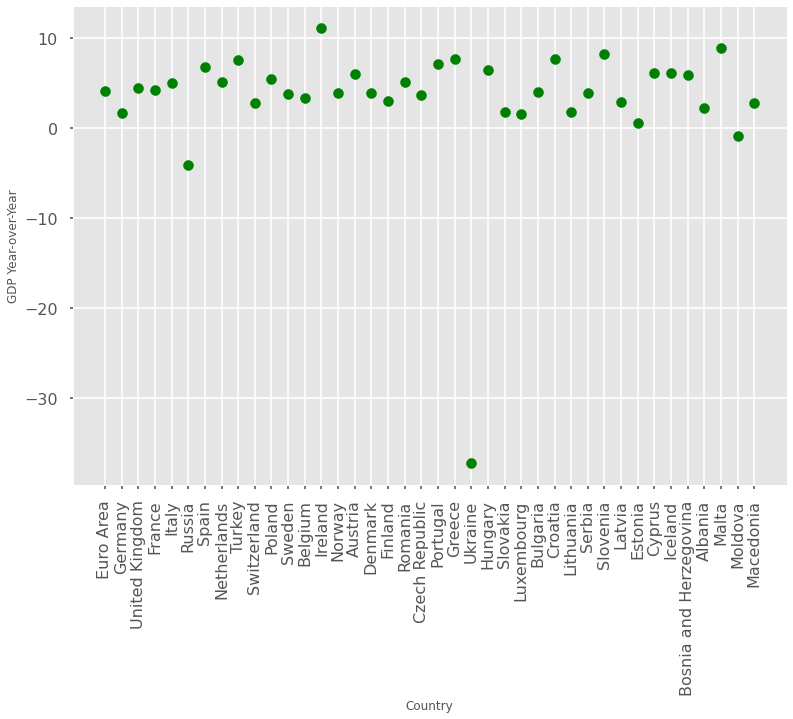

In [19]:
plt.figure(figsize = (8,8), dpi =80)
data_df.plot.scatter(x = 'Country', y = 'GDP Year-over-Year', s = 100, c = 'green', rot=90)

# Analysing the data for possible trends and looking for connections to the above mentioned questions. 

# 1. Is a healthy GDP linked to a smaller or larger population? 

<AxesSubplot:xlabel='Population', ylabel='GDP Year-over-Year'>

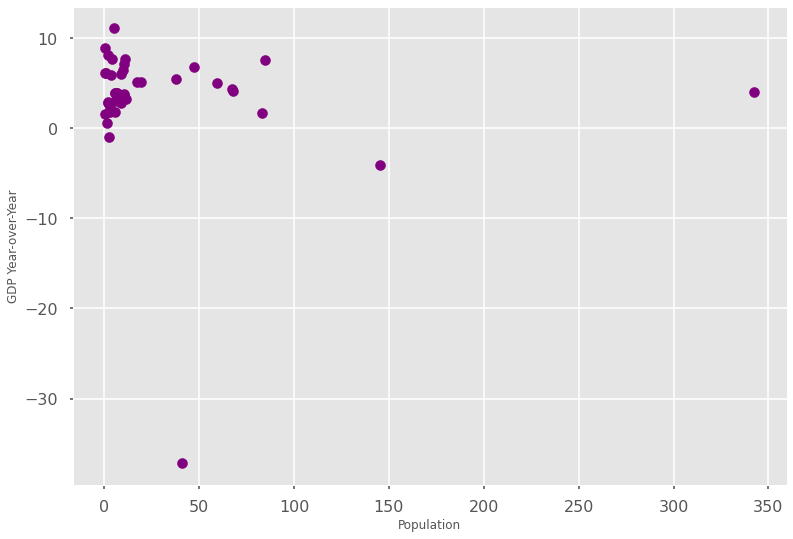

In [20]:
data_df.plot.scatter(x = 'Population', y = 'GDP Year-over-Year', s = 100, c = 'purple')

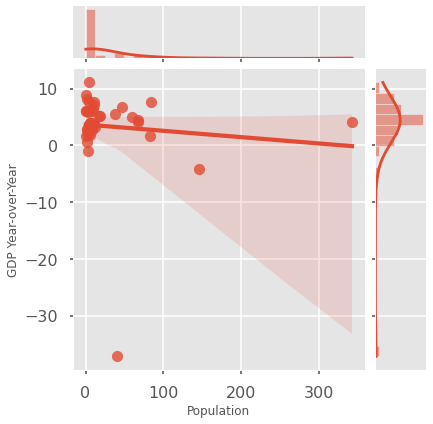

In [21]:
sns.jointplot(x='Population', y='GDP Year-over-Year', data=data_df, kind="reg");

In the above plots, there seems to be a link between a smaller population size and a healthy GDP. The outliers are not consided because these countries are either in war or a collection of the Eurozone.  

# 2. Does the jobless rate affect the GDP and /or Government budget? 

<AxesSubplot:xlabel='GDP Year-over-Year', ylabel='Jobless Rate'>

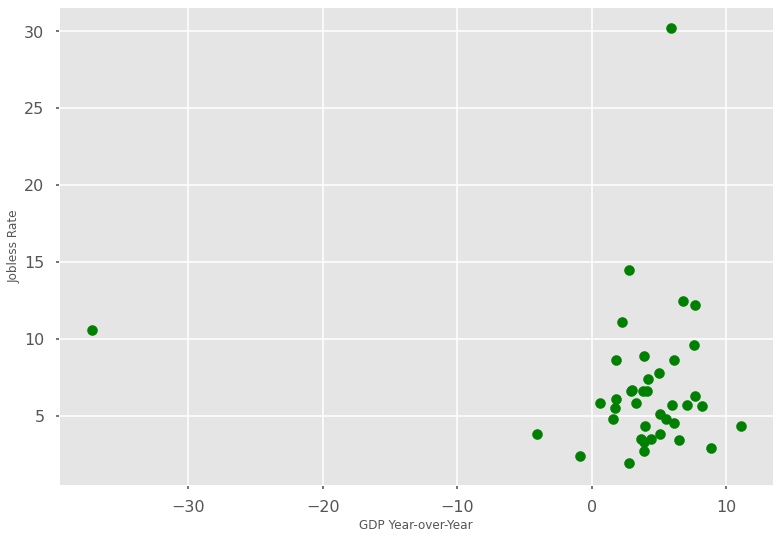

In [22]:
data_df.plot.scatter(x = 'GDP Year-over-Year', y = 'Jobless Rate', s = 100, c = 'green')

There seems to be a strong correlation between a healthy GDP and low rate of joblessness. 

<AxesSubplot:xlabel='GDP', ylabel='Gov. Budget'>

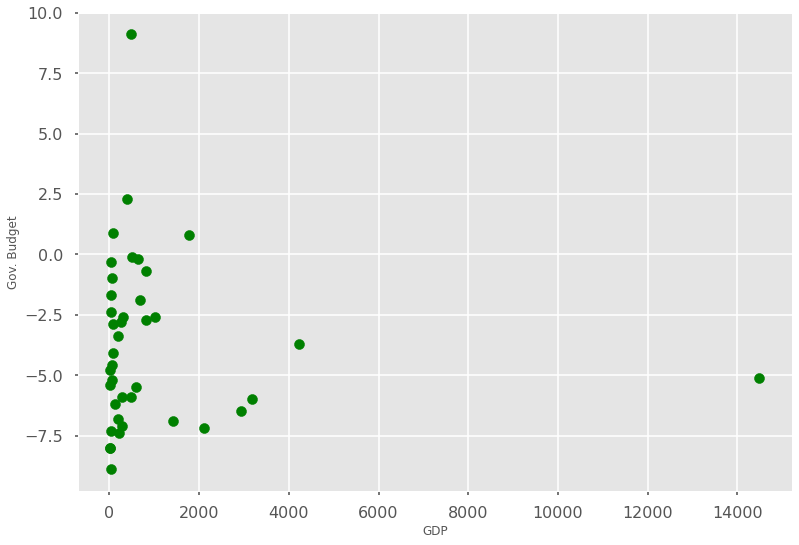

In [23]:
data_df.plot.scatter(x = 'GDP', y = 'Gov. Budget', s = 100, c = 'green')

A negative govenment budget is linked to a healthy GDP. 

<AxesSubplot:xlabel='GDP'>

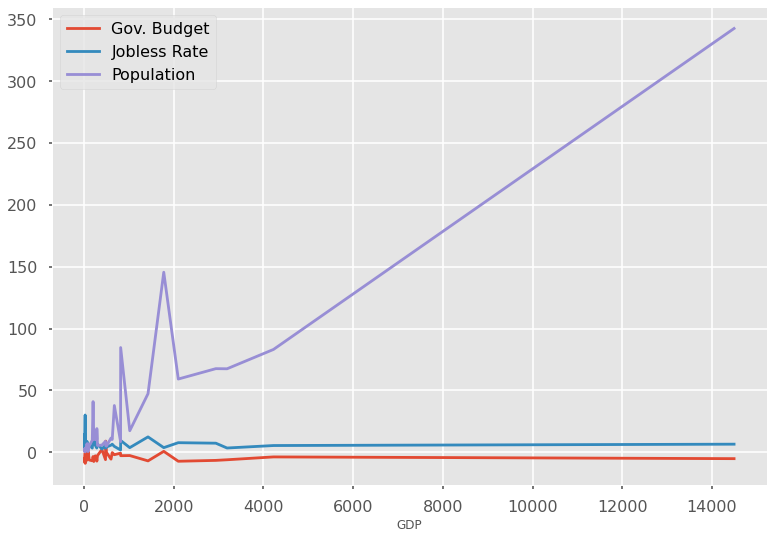

In [24]:
axes = plt.gca()
data_df.plot(x = 'GDP', y = 'Gov. Budget' , ax = axes)
data_df.plot(x = 'GDP', y = 'Jobless Rate' , ax = axes)
data_df.plot(x = 'GDP', y = 'Population' , ax = axes)

From this view of the line plot, it is evident that an increased poplulation is linked to an unhealthy GDP. But there is not a drastic correlation between the GDP, jobless rate and Govenment budget. 

# 3. How does inflation rate affect the jobless rate? 

<AxesSubplot:xlabel='Jobless Rate', ylabel='Inflation Rate'>

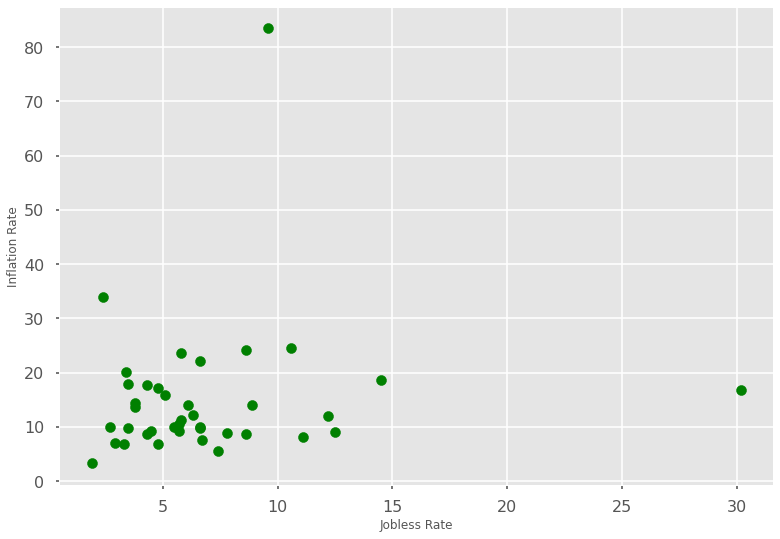

In [25]:
data_df.plot.scatter(x = 'Jobless Rate', y = 'Inflation Rate', s = 100, c = 'green')

In this scatter plot, there is a link between a low inflation rate and low jobless rate. 

# Feature Correlation

Feature Correlation of all data. Using a heatmap, I want to explore possible feature correlations between the different variables. 

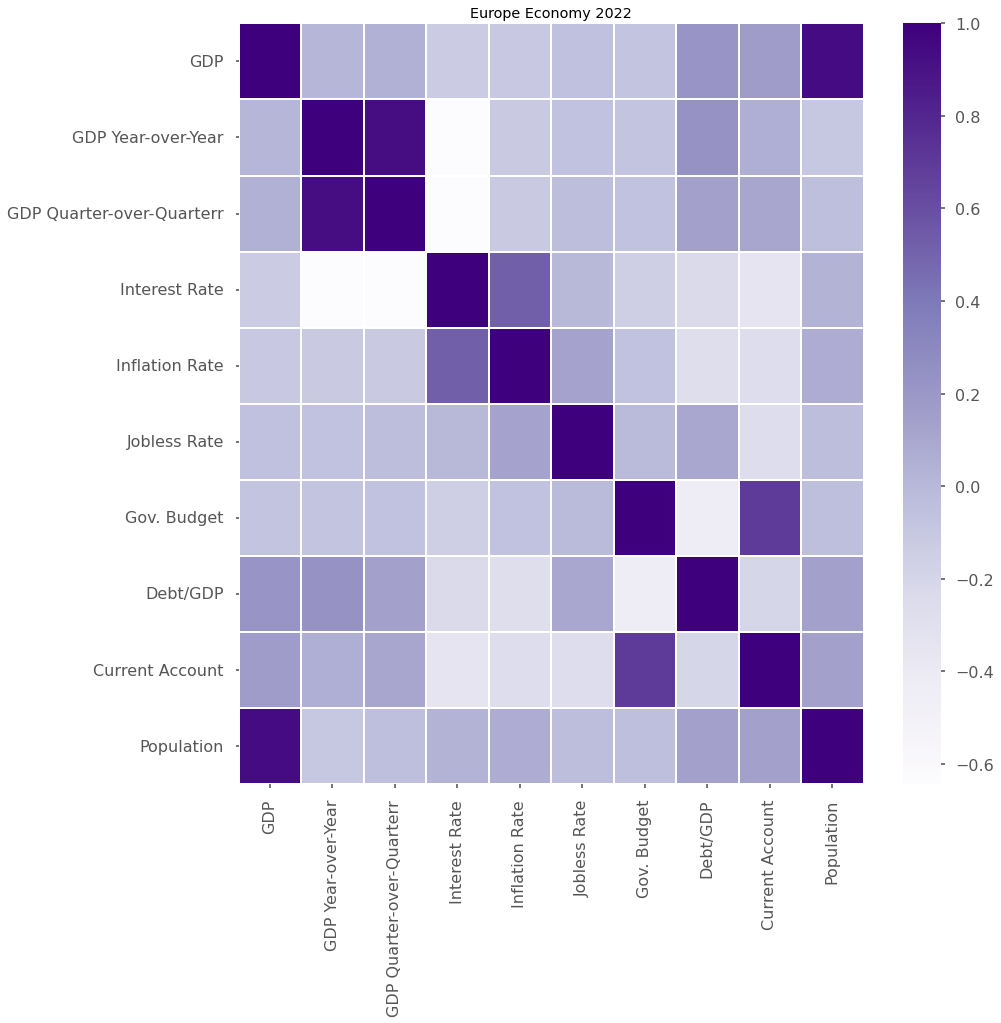

In [26]:
plt.figure(figsize = (14,14))
plt.title('Europe Economy 2022')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Purples")
plt.show()

Some of the direct correlations are: 
1. the GDP and Population
2. current account and govenment budget. I will not explore this correlation becuase I do not have enough data about this coloumn from the dataset. 

Some of the inverse correlations are:
1. Debt/GDP and Govenment budget. 


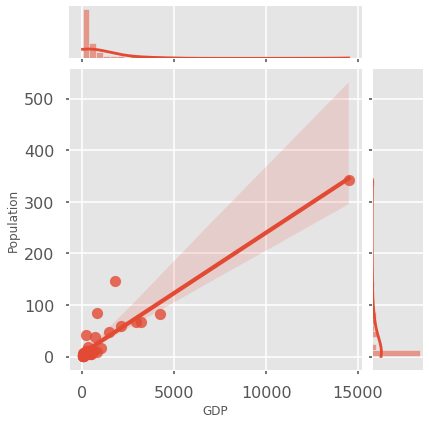

In [27]:
#GDP and Population
sns.jointplot(x='GDP', y='Population', data=data_df, kind="reg");

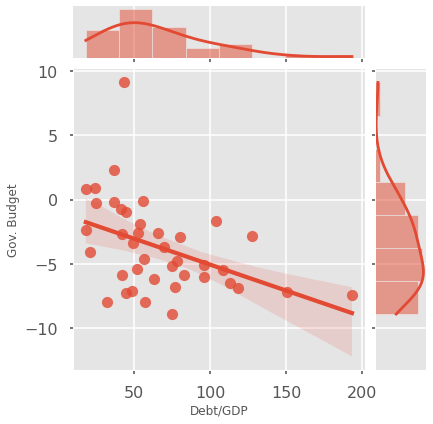

In [28]:
#Debt/GDP and Gov.Budget
sns.jointplot(x='Debt/GDP', y='Gov. Budget', data=data_df, kind="reg");

Both plots displayed above, confirm their correlations. 

In [ ]:
#total = data_df.isnull().sum().sort_values(ascending = False)
#percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
#pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

In [ ]:
#y_train.fillna(y_train.mean(), inplace = True)

# Using Machine Learning Models to identify Feature Importance to the different Countries. 

# Random Forest Classifier

In [55]:
target = 'Country'
predictors = ['GDP', 'GDP Year-over-Year', 'GDP Quarter-over-Quarterr', 'Inflation Rate', 'Jobless Rate', 'Gov. Budget',
       'Debt/GDP', 'Current Account', 'Population']

In [56]:
train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [57]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [58]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_estimators=1000, n_jobs=4, random_state=2018,
                       verbose=False)

In [59]:
preds = clf.predict(valid_df[predictors])

# Visualise feature importance

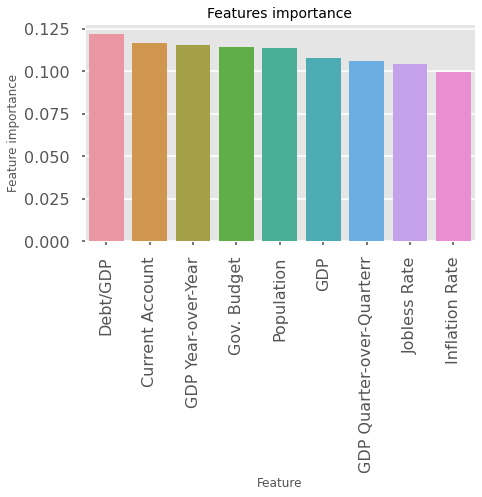

In [60]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

From the above plot, it is clear that the most important features to a country is there Debt/GDP and next most important is the Current Account and Yearly GDP. 

# CatBoost Classifier

In [50]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [51]:
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 67.1ms	remaining: 33.5s
50:	total: 305ms	remaining: 2.69s
100:	total: 515ms	remaining: 2.03s
150:	total: 814ms	remaining: 1.88s
200:	total: 1.13s	remaining: 1.67s
250:	total: 1.4s	remaining: 1.39s
300:	total: 1.68s	remaining: 1.11s
350:	total: 1.98s	remaining: 840ms
400:	total: 2.4s	remaining: 592ms
450:	total: 2.63s	remaining: 286ms
499:	total: 2.95s	remaining: 0us


In [52]:
preds = clf.predict(valid_df[predictors])

# Feature Importance

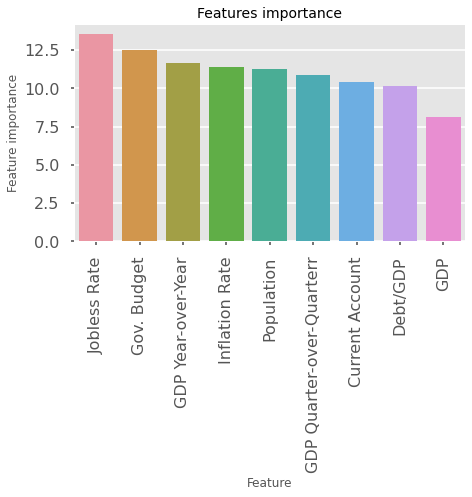

In [53]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

From the above plot, it is clear that the most important features to a country is Jobless Rate, Gov.budget and GDP yearly. 

# Conclusion

From my analysis above in exploring this dataset, I have concluded that there is a trend in the following pieces of data: 
1. There is a link between smaller population sizes and a healthy GDP. The outliers are not considered because these countries are either at war or a collection of the Eurozone.
2. There is a strong correlation between a healthy GDP and a low rate of joblessness. 
3. It is evident that an increased population is linked to an unhealthy GDP. But there is no drastic correlation between the GDP, jobless rate and Government budget.
4. Lastly, there is a link between a low inflation rate and a low jobless rate.
5. The surprising anayslis is the feature importance identification using Random Forest Classifer. The most important features to the different countries were the Current Account, Jobless rate and Yearly GDP. I assumed through my exloration of the data that Population would be the highest/most important feature. Using CatBoost Classifier to identify feature importance, Jobless Rate, Gov.budget and GDP yearly were the most important features. The commonality between the two classifiers are Jobless Rate. 

